In [9]:
library(tm)
library(jsonlite)
library(tm)
library(dplyr)
library(wordcloud)
library(tidyr)
library(plotrix)

Loading required package: NLP
Warning message:
“package ‘NLP’ was built under R version 3.3.3”Warning message:
“package ‘jsonlite’ was built under R version 3.3.3”
Attaching package: ‘jsonlite’

The following object is masked from ‘package:qdapRegex’:

    validate


Attaching package: ‘dplyr’

The following object is masked from ‘package:qdapTools’:

    id

The following objects are masked from ‘package:qdapRegex’:

    escape, explain

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Warning message:
“package ‘plotrix’ was built under R version 3.3.3”

In [18]:
articles <- fromJSON("../data/welt.json")
#head(articles)
dim(articles)

[1] 888   9

In [11]:
content <- articles$content
content[3]

[1] "Als um Punkt 20 Uhr das Gesicht des Siegers auf Leinwand erscheint, ein altes, französisches Ritual, gibt es Buhrufe, Proteste, Krach und auch ein paar Tränen im „Chalet du Lac“. Dann stimmen die Anhänger des Front National die Marseillaise an: „Marchons, marchons...“. Ausgerechnet. Das erinnert nämlich stark an den Namen der Bewegung En Marche des Gegners und Siegers Emmanuel Macron. Und kommt nun aus den Mündern derer, die glauben, der neue Präsident werden Frankreich geradewegs ins Verderben führen. Front-National-Kandidatin Marine Le Pen hatte gehofft, zumindest über die 40-Prozent-Grenze zu kommen; doch selbst das hat nicht geklappt. Sie ahnte, dass sie verlieren würde: Le Pen hat keinen großen Platz in Paris absperren, kein Podium aufbauen, keine Musikanlagen für das große Feiern installieren lassen.  In das „Chalet du Lac“, das sie für die Wahlparty gemietet hat, passen gerade mal 1400 Menschen rein. Die meisten davon sind Journalisten, Kamerateams aus aller Welt. Die anderen sehen aus, als hätten sie sich für die Konfirmation schick gemacht. Einige französische Medien sind aus Protest ferngeblieben, um gegen das Vorgehen des FN zu protestieren, unliebsame Medien nicht hereinzulassen. Das „Chalet du Lac“, am Rande des Bois de Vincennes gelegen, ist im grünen Empirestil gehalten und sieht von außen aus wie eine übergroße Packung Macarons. Lange Zeit war es eine „Guinguette“, ein Tanzlokal am Wasser, wo die Pariser Gesellschaft im Sommer Frische suchte.  Vor einigen Jahren wurde es vom Designer-Star Philippe Starck geliftet, der eine überdimensionierte Discokugel an die Decke gehängt, unter der wochentags alte Damen und Herren beim Tanztee über das Parkett fegen. Die Stimmung ist dann vermutlich ausgelassener als an diesem Wahlabend. „Merci, Marine!“, skandieren die Anhänger, als Le Pen nach einer kurzen, nur drei Minuten dauernde Rede die Bühne wieder verlässt. Das Ergebnis ist eine bittere Niederlage für Le Pen. Die blauen Kunstrosen, die den FN-Gästen am Eingang überreicht wurden, wirken bereits wenige Minuten nach acht Uhr wie aus einem Trauergesteck herausgerissen. Nur kurz wurden sie geschwenkt. Schon am nächsten Tag werden sie auf dem Grab der Partei liegen.  Quelle: AP Die Partei müsse sich erneuern, sagt Le Pen während ihrer kurzen Ansprache. Alle Patrioten müssten sich zusammentun. Das klingt, als habe sie ganz Neues vor. Den Namen FN und die Symbole der alten Partei hatte sie schon in den Wochen des Wahlkampfs verschwinden lassen. Jetzt scheint sie die Partei des Vaters komplett beerdigen zu wollen, um die leidige Last der Vergangenheit endgültig abzuwerfen. Pierre, 67 Jahre, ehemals Professor an der renommierten Hochschule „Sciences Po“, ist trotz der deutlichen Niederlage stolz auf seine Kandidatin. Im karierten Wolljackett steht er unter den Scheinwerfern und stößt mit Champagner an.  „Marine musste sich gegen alle stellen, vor allem gegen die Medien, die ausnahmslos gegen sie waren“, sagt Pierre. Es gebe also keinen Grund zur Niedergeschlagenheit. Anders als andere Rentner hat er keine Angst durch den Ausstieg aus dem Euro die Ersparnisse seines Lebens zu verlieren. Europa? „Wir sind doch heute alle Europäer.“ Emmanuel Macron, der Siegers dieses Wahlabends, ist das Feindbild der Rechtspopulisten. Er steht für das, was der FN zu bekämpfen behauptet: Neoliberalismus, Globalisierung, Europa, Elite. „Ich habe ihm gratuliert und Erfolg gewünscht“, sagt Le Pen, die zuvor mit ihm telefoniert hatte, vor ihren Anhängern. Politik, das ist auch immer Storytelling. Florian Philippot, der Parteivize, lobt den „erfolgreichen Wahlkampf“. Noch nie zuvor sei der FN so groß, so mächtig gewesen. 2002, als Jean-Marie Le Pen überraschend in die Stichwahl kam, hatte er 5,5 Millionen Stimmen. Drei Wahlen und 15 Jahre später zählen die Rechtspopulisten 11,5 Millionen Wähler. Quelle: dpa infocom  Der neu gewählte französische Präsident Emmanuel Macron will die Spaltung des Landes überwinden. Er „kenne die Wut, die Angst und di

In [12]:
vs <- VectorSource(content)
corpus <- VCorpus(vs)
corpus[[3]]

<<PlainTextDocument>>
Metadata:  7
Content:  chars: 4093

In [13]:
clean_corpus <- function(corpus){
  corpus <- tm_map(corpus, removePunctuation)
  corpus <- tm_map(corpus, content_transformer(tolower))
  corpus <- tm_map(corpus, removeWords, c(stopwords("de"), "sagte", "dass", "sei", "mehr", "wurde", "schon", "seit", 
                                          "gibt", "immer", "bereits", "sagt", "geht", "dafür", "viele"))
  corpus <- tm_map(corpus, stripWhitespace)
  return(corpus)
}

corpus_clean <- clean_corpus(corpus)
corpus_clean[[3]]$content

[1] " punkt 20 uhr gesicht siegers leinwand erscheint altes französisches ritual buhrufe proteste krach paar tränen chalet lac stimmen anhänger front national marseillaise marchons marchons ausgerechnet erinnert nämlich stark namen bewegung en marche gegners siegers emmanuel macron kommt mündern glauben neue präsident frankreich geradewegs verderben führen frontnationalkandidatin marine le pen gehofft zumindest 40prozentgrenze kommen geklappt ahnte verlieren le pen großen platz paris absperren podium aufbauen musikanlagen große feiern installieren lassen chalet lac wahlparty gemietet passen gerade mal 1400 menschen rein meisten davon journalisten kamerateams welt sehen hätten konfirmation schick gemacht französische medien protest ferngeblieben vorgehen fn protestieren unliebsame medien hereinzulassen chalet lac rande bois de vincennes gelegen grünen empirestil gehalten sieht außen übergroße packung macarons lange zeit guinguette tanzlokal wasser pariser gesellschaft sommer frische suchte jahren designerstar philippe starck geliftet überdimensionierte discokugel decke gehängt wochentags alte damen herren beim tanztee parkett fegen stimmung vermutlich ausgelassener wahlabend merci marine skandieren anhänger le pen kurzen drei minuten dauernde rede bühne verlässt ergebnis bittere niederlage le pen blauen kunstrosen fngästen eingang überreicht wurden wirken wenige minuten acht uhr trauergesteck herausgerissen kurz wurden geschwenkt nächsten tag grab partei liegen quelle ap partei müsse erneuern le pen kurzen ansprache patrioten müssten zusammentun klingt ganz neues namen fn symbole alten partei wochen wahlkampfs verschwinden lassen scheint partei vaters komplett beerdigen leidige last vergangenheit endgültig abzuwerfen pierre 67 jahre ehemals professor renommierten hochschule sciences po trotz deutlichen niederlage stolz kandidatin karierten wolljackett steht scheinwerfern stößt champagner marine stellen medien ausnahmslos pierre gebe grund niedergeschlagenheit rentner angst ausstieg euro ersparnisse lebens verlieren europa heute europäer emmanuel macron siegers wahlabends feindbild rechtspopulisten steht fn bekämpfen behauptet neoliberalismus globalisierung europa elite gratuliert erfolg gewünscht le pen zuvor telefoniert anhängern politik storytelling florian philippot parteivize lobt erfolgreichen wahlkampf nie zuvor fn groß mächtig 2002 jeanmarie le pen überraschend stichwahl kam 55 millionen stimmen drei wahlen 15 jahre später zählen rechtspopulisten 115 millionen wähler quelle dpa infocom neu gewählte französische präsident emmanuel macron spaltung landes überwinden kenne wut angst zweifel franzosen erste rede wahlsiegers quelle n24sebastian plantholt "

In [14]:
corpus_tdm <- TermDocumentMatrix(corpus_clean)
corpus_tdm

<<TermDocumentMatrix (terms: 29146, documents: 888)>>
Non-/sparse entries: 119757/25761891
Sparsity           : 100%
Maximal term length: 68
Weighting          : term frequency (tf)

In [15]:
corpus_m <- as.matrix(corpus_tdm)
dim(corpus_m)

[1] 29146   888

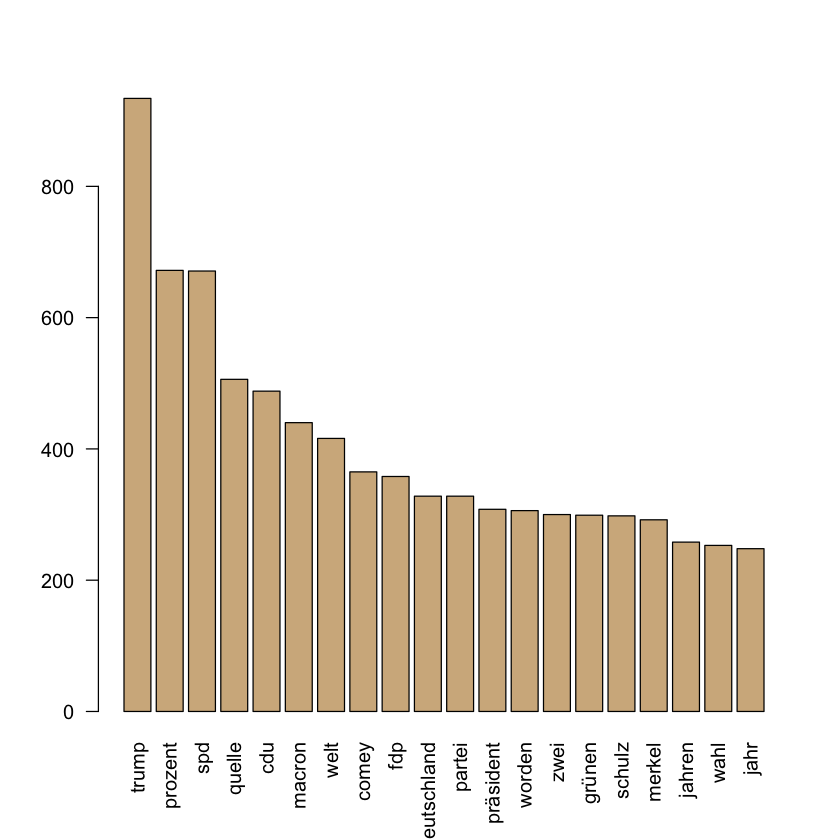

In [16]:
term_frequency <- rowSums(corpus_m)
term_frequency_sorted <- sort(term_frequency, decreasing=TRUE)
barplot(term_frequency_sorted[1:20], col="tan", las=2)

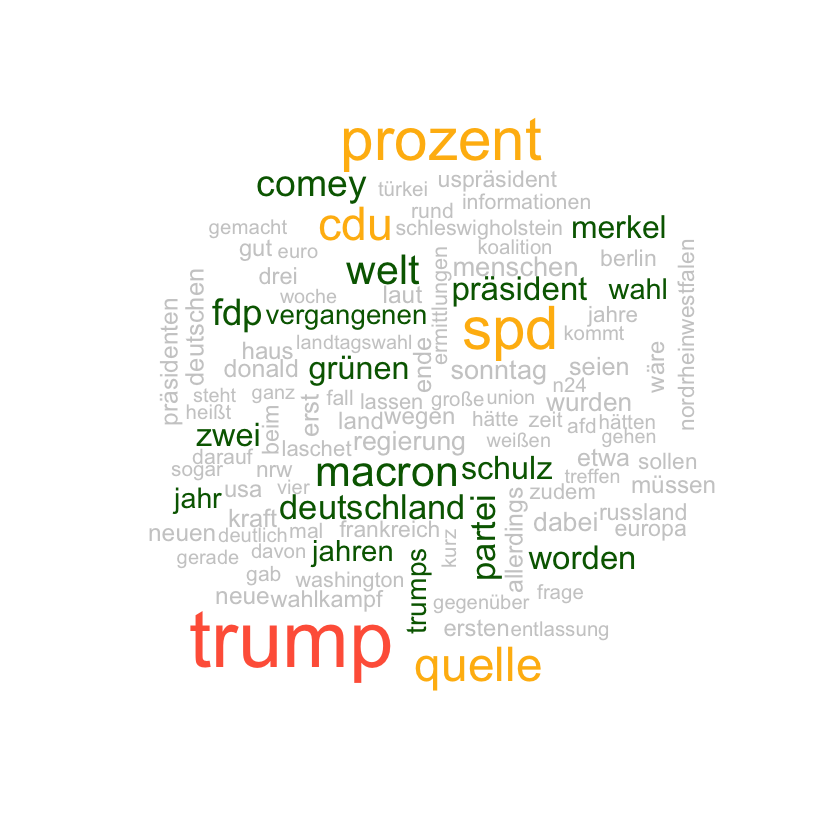

In [10]:
term <- names(term_frequency_sorted)
num <- term_frequency_sorted
word_freqs <- data.frame(term, num)

wordcloud(word_freqs$term, word_freqs$num, max.words=100, colors = c("grey80", "darkgreen","darkgoldenrod1", "tomato"))

In [11]:
common_words <- subset(corpus_m, corpus_m[, 1] > 0 & corpus_m[, 2] > 0)
#difference <- abs(common_words[, 1] - common_words[, 2])
#common_words <- cbind(common_words, difference)
#common_words <- common_words[order(common_words[, 3], decreasing = TRUE), ]
#top25_df <- data.frame(x = common_words[1:25, 1], 
#                       y = common_words[1:25, 2], 
#                       labels = rownames(common_words[1:25, ]))
#pyramid.plot(top25_df$x, top25_df$y, labels=top25_df$labels, gap = 8, 
#             top.labels = c("spd", "Words", "prozent"), main = "Words in Common", laxlab = NULL, raxlab = NULL, 
#             unit = NULL)
dim(common_words)


[1]   9 888

In [12]:
corpus_m[1:10,1:10]

,1,2,3,4,5,6,7,8,9,10
000,0,0,0,0,0,0,0,0,0,0
035,0,0,0,0,0,0,0,0,0,0
060,0,0,0,0,0,0,0,0,0,0
0630,0,0,0,0,0,0,0,0,0,0
0715,0,0,0,0,0,0,0,0,0,0
08021988,0,0,0,0,0,0,0,0,0,0
090,0,0,0,0,0,0,0,0,0,0
100,0,0,0,0,0,0,0,0,0,0
1000,0,0,0,0,0,0,0,0,0,0
10000,0,0,0,0,0,0,0,0,0,0


In [13]:
str(articles)

'data.frame':	888 obs. of  9 variables:
 $ author       : chr  "Jana Werner" "" "" "" ...
 $ content      : chr  "Sein Timing hätte besser nicht sein können. Gerade in dem Moment, als die Fernsehsender die ersten tief enttäuschten Reaktionen"| __truncated__ "Baden-Württembergs Ministerpräsident Winfried Kretschmann (Grüne) hat Eltern an Deutschlands Schulen zu einem Miteinander mit d"| __truncated__ "Als um Punkt 20 Uhr das Gesicht des Siegers auf Leinwand erscheint, ein altes, französisches Ritual, gibt es Buhrufe, Proteste,"| __truncated__ "„Eine neue Ära“ für Frankreich kündigte der Moderator David Pujadas wenige Sekunden vor 20 Uhr an. In jedem Fall werde das Amt "| __truncated__ ...
 $ tags         :List of 888
  ..$ : chr  "Werner-Jana" "CDU" "Günther" "Daniel (CDU Schleswig-Holstein)" ...
  ..$ : chr  "Newsteam" "Kretschmann" "Winfried" "Bündnis 90/Die Grünen"
  ..$ : chr  "Pen" "Jean-Marie Le" "Präsidentenwahlen" "Pen" ...
  ..$ : chr  "Präsidentschaftswahlkämpfe" "Pen" "Marine

In [16]:
df <- unnest(articles, tags)
head(df)

author,content,provider_name,link,description,guid,pubDate,title,tags


In [35]:
df$tags <- as.factor(df$tags)
tags <- df %>% group_by(tags) %>% summarise(n = n())
tags_ordered <- arrange(tags,desc(n))
tags_ordered

tags,n
Newsteam,288
Trump,173
Donald (geb.1946),165
Landtagswahlen,131
USA,130
Nordrhein-Westfalen,115
SPD,104
Angela,80
CDU,80
Merkel,80


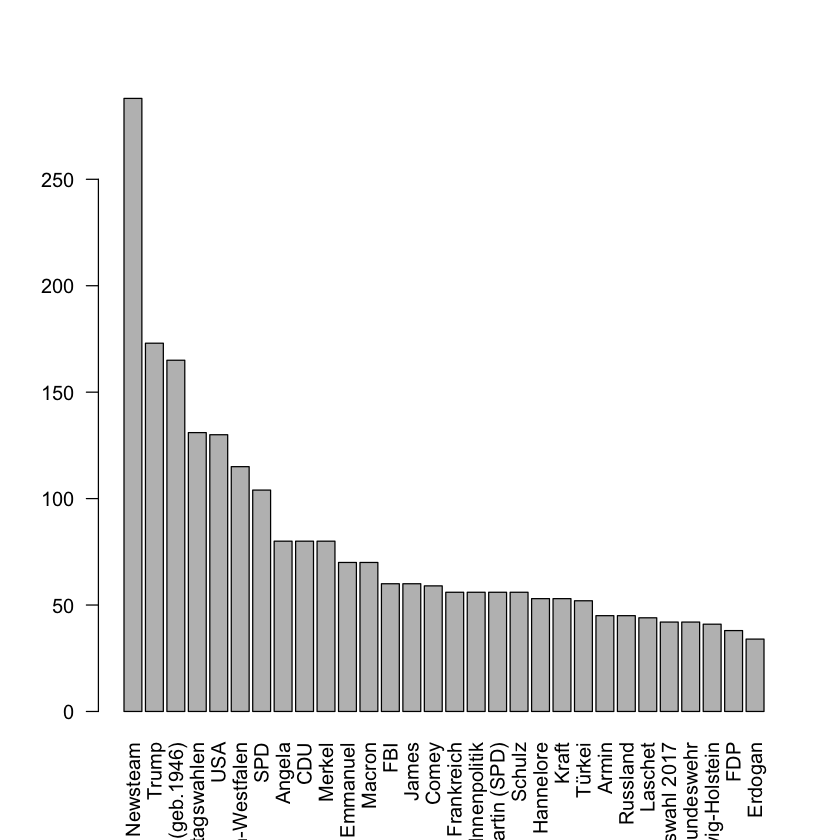

In [40]:
barplot(tags_ordered$n[1:30], names.arg=tags_ordered$tags[1:30], las=2)

In [51]:
clean_corpus <- function(corpus){
  corpus <- tm_map(corpus, removePunctuation)
  corpus <- tm_map(corpus, content_transformer(tolower))
  corpus <- tm_map(corpus, removeWords, c(stopwords("de"), "sagte", "dass", "sei", "mehr", "wurde", "schon", "seit", 
                                          "gibt", "immer", "bereits", "sagt", "geht", "dafür", "viele"))
  corpus <- tm_map(corpus, stripWhitespace)
  return(corpus)
}

buildwordcloud <- function(vc) {
    vs <- VectorSource(vc)
    corpus <- VCorpus(vs)
    corpus_clean <- clean_corpus(corpus)
    corpus_tdm <- TermDocumentMatrix(corpus_clean)
    corpus_m <- as.matrix(corpus_tdm)
    term_frequency <- rowSums(corpus_m)
    term_frequency_sorted <- sort(term_frequency, decreasing=TRUE)
    
    term <- names(term_frequency_sorted)
    num <- term_frequency_sorted
    word_freqs <- data.frame(term, num)
    wordcloud(word_freqs$term, word_freqs$num, max.words=100, colors = c("grey80", "darkgreen","darkgoldenrod1", "tomato"))
}

[1] 6230    9

[1] 34  9

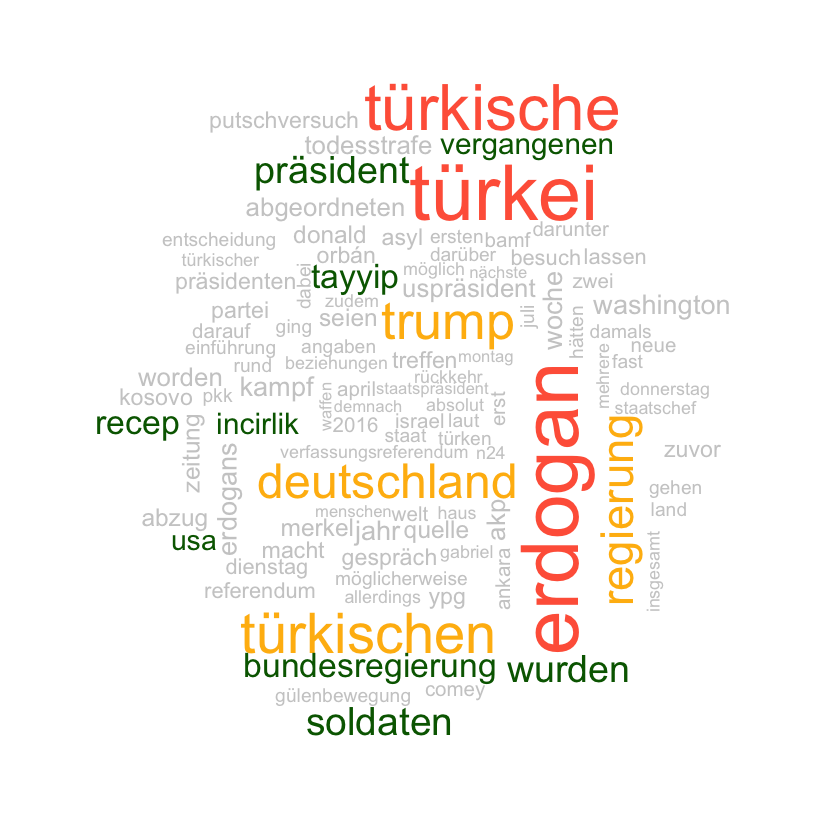

In [52]:
filtered <- filter(df, tags == "Erdogan")
buildwordcloud(filtered$content)

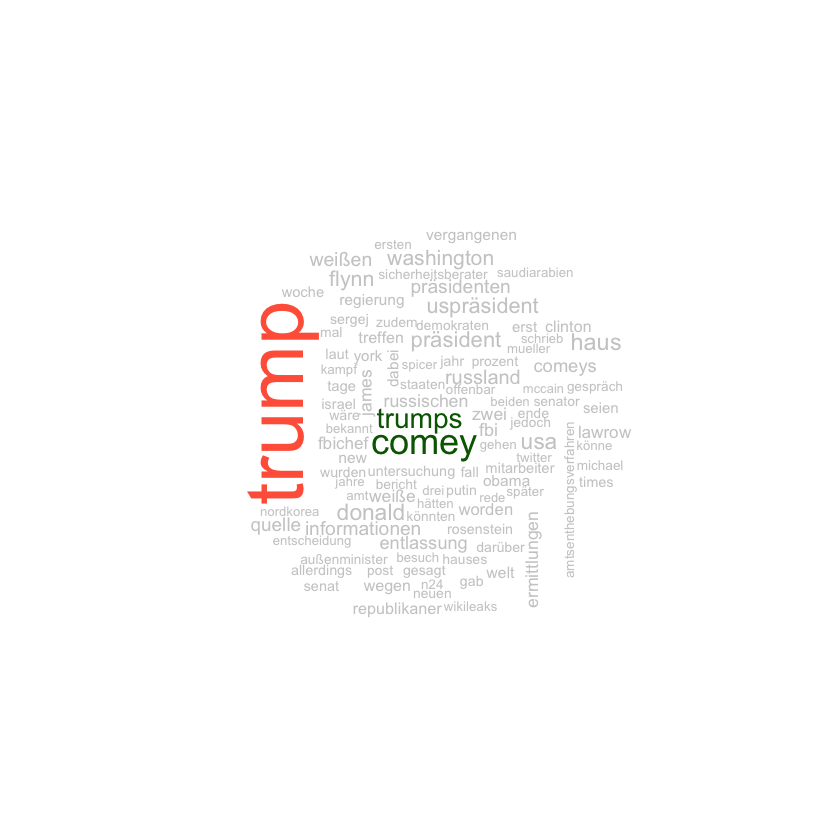

In [53]:
filtered <- filter(df, tags == "USA")
buildwordcloud(filtered$content)

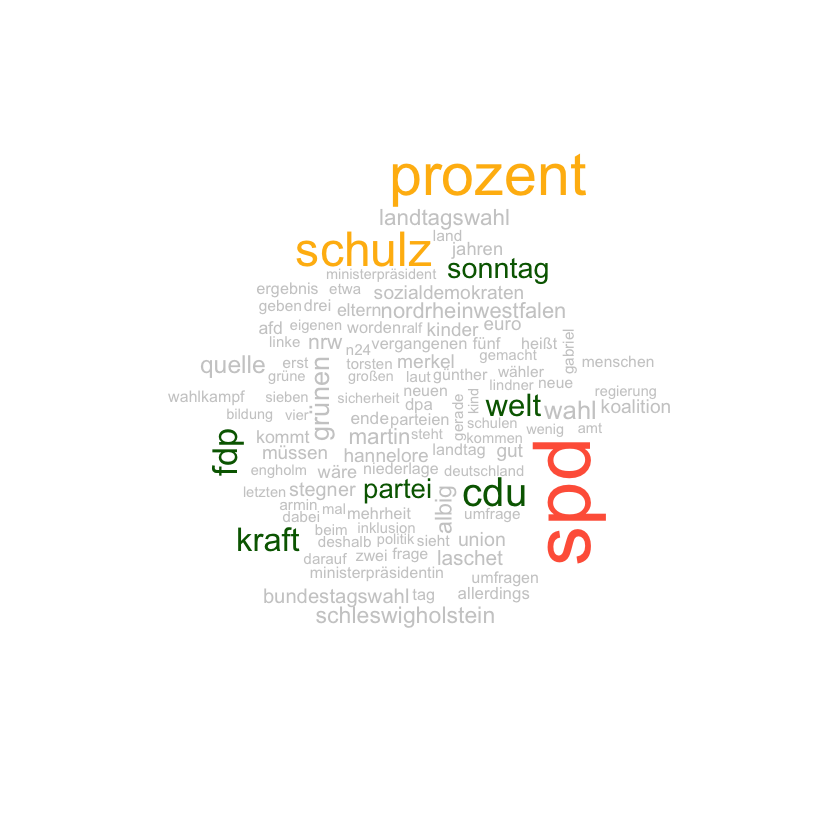

In [54]:
filtered <- filter(df, tags == "SPD")
buildwordcloud(filtered$content)

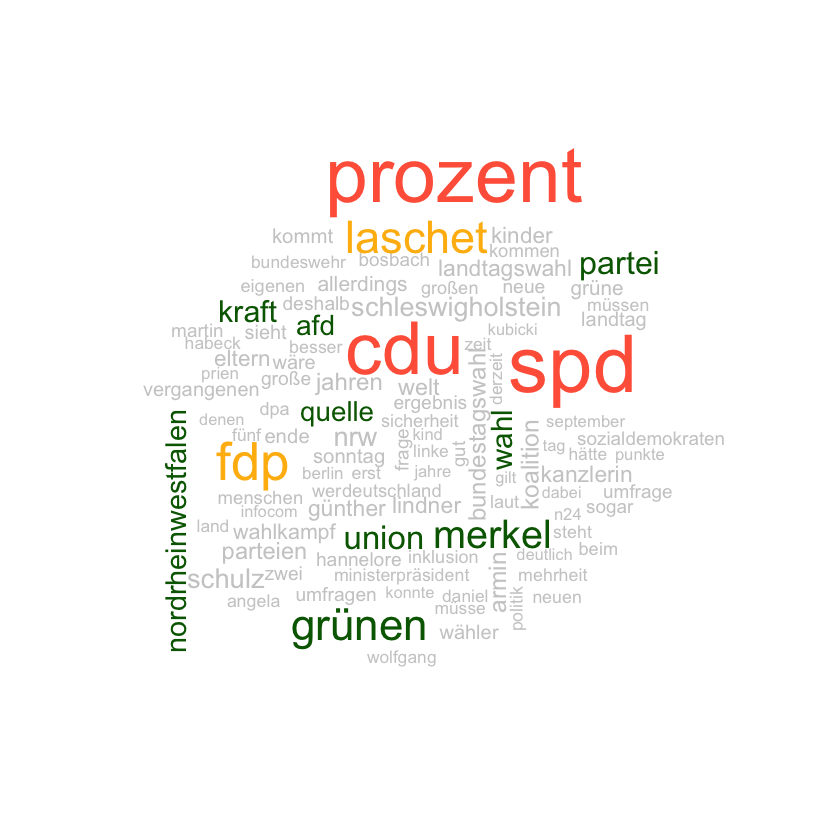

In [55]:
filtered <- filter(df, tags == "CDU")
buildwordcloud(filtered$content)

 chr [1:2] "Sein Timing hätte besser nicht sein können. Gerade in dem Moment, als die Fernsehsender die ersten tief enttäuschten Reaktionen"| __truncated__ ...


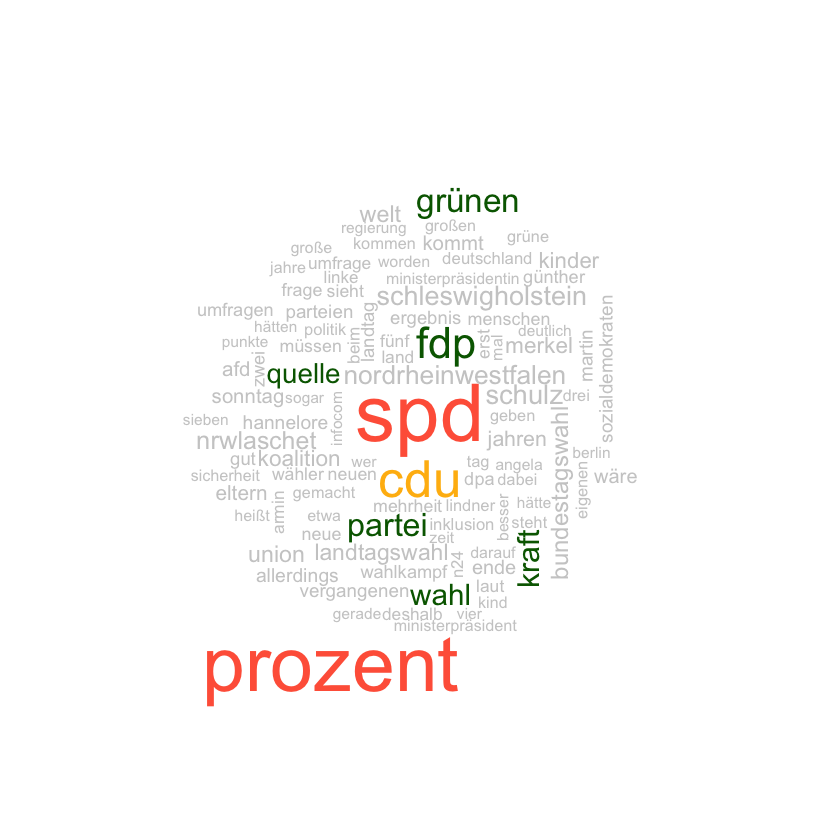

In [71]:
only_spd <- df %>% filter(tags == "SPD")
only_cdu <- df %>% filter(tags == "CDU")

all_spd <- paste(only_spd$content, collapse = " ")
all_cdu <- paste(only_cdu$content, collapse = " ")

all_text <- c(all_spd, all_cdu)

all_text_vs <- VectorSource(all_text)
all_corpus <- VCorpus(all_text_vs)

all_clean <- clean_corpus(all_corpus)
all_tdm <- TermDocumentMatrix(all_clean)
all_m <- as.matrix(all_tdm)

commonality.cloud(all_m, colors = c("grey80", "darkgreen","darkgoldenrod1", "tomato"), max.words = 100)

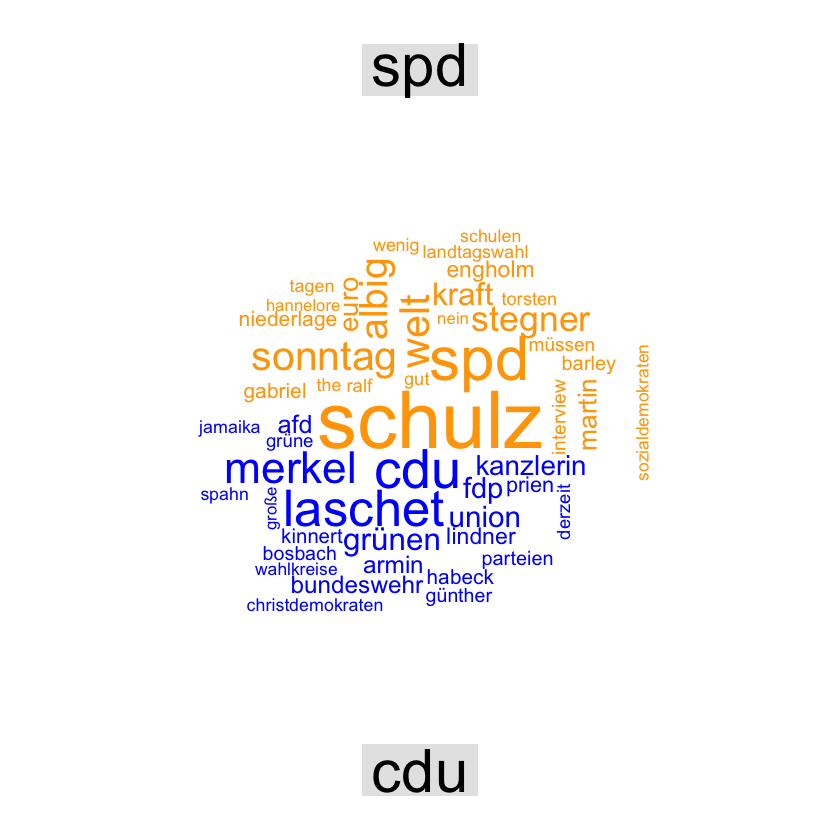

In [73]:
colnames(all_tdm) <- c("spd", "cdu")
all_m <- as.matrix(all_tdm)
comparison.cloud(all_m, colors=c("orange", "blue"), max.words=50)

[1] 5.1 4.1 4.1 2.1

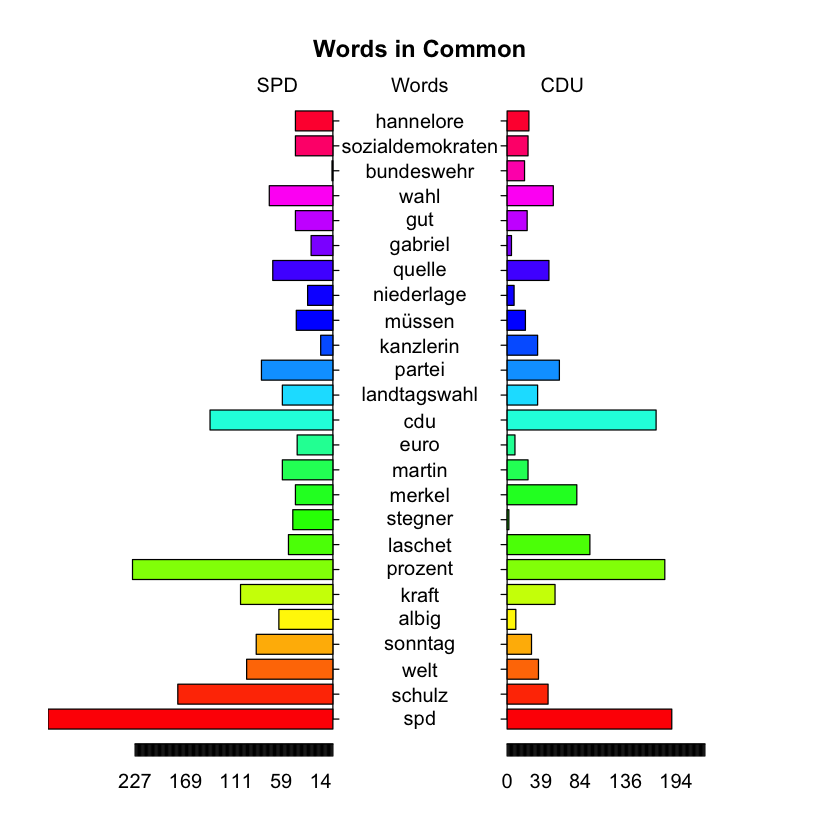

In [84]:
common_words <- subset(all_m, all_m[, 1] > 0 & all_m[, 2] > 0)
difference <- abs(common_words[, 1] - common_words[, 2])
common_words <- cbind(common_words, difference)
common_words <- common_words[order(common_words[, 3], decreasing = TRUE), ]
top25_df <- data.frame(x = common_words[1:25, 1], 
                       y = common_words[1:25, 2], 
                       labels = rownames(common_words[1:25, ]))
pyramid.plot(top25_df$x, top25_df$y, labels = top25_df$labels, 
             gap = 100, top.labels = c("SPD", "Words", "CDU"), 
             main = "Words in Common", laxlab = NULL, 
             raxlab = NULL, unit = NULL)

In [88]:
# Word association
word_associate(only_spd$content, match.string = c("schulz"), 
               stopwords = c(Top200Words, "chardonnay", "amp"), 
               network.plot = TRUE, cloud.colors = c("gray85", "darkred"))

# Add title
title(main = "SPD Corpus associated with schulz")

ERROR: Error in eval(expr, envir, enclos): konnte Funktion "word_associate" nicht finden
